In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM


In [31]:
data = pd.read_csv('../data/TSLA.csv')
obs = data['Close'].values.reshape(-1, 1)
logret = np.diff(np.log(obs), axis=0)


In [32]:
ghmm = GaussianHMM(n_components=2, covariance_type='full', n_iter=1000)
ghmm.fit(logret)

GaussianHMM(covariance_type='full', n_components=2, n_iter=1000)

In [33]:
# Find bull and bear states
bull_state = np.argmax(ghmm.means_)
bear_state = 1 - bull_state

# Find bull and bear probabilities
print(ghmm.transmat_) 

[[0.78787382 0.21212618]
 [0.07474141 0.92525859]]


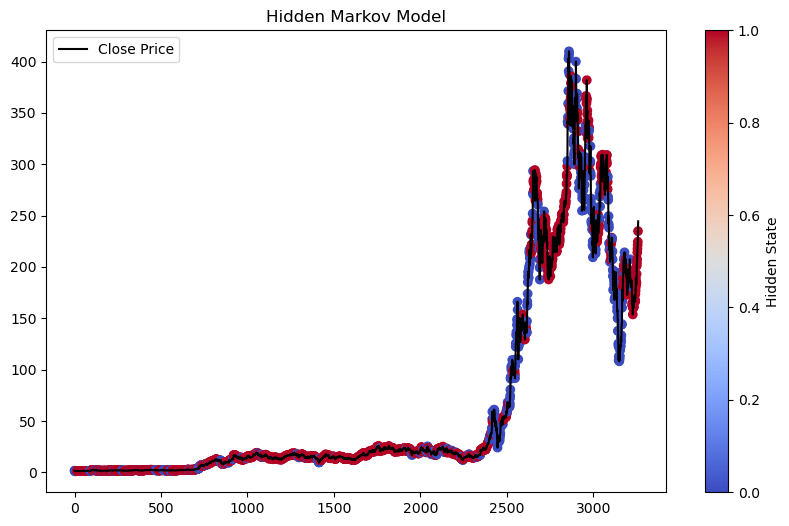

In [35]:
# Plot the data, and color the bull and bear states
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close Price', color='black')
plt.scatter(data.index[:-1], data['Close'][:-1], c=ghmm.predict(logret), cmap='coolwarm')
plt.colorbar(label='Hidden State')
plt.title('Hidden Markov Model')
plt.legend()
plt.show()

